In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('dataset/crime.csv')
df['counter'] = 1
lb_make = LabelEncoder()
#df["HUNDRED_BLOCK"] = df["HUNDRED_BLOCK"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
#df['NEIGHBOURHOOD_CODE'] = lb_make.fit_transform(df['NEIGHBOURHOOD'].astype(str))

In [4]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1


# What are the various types of crime

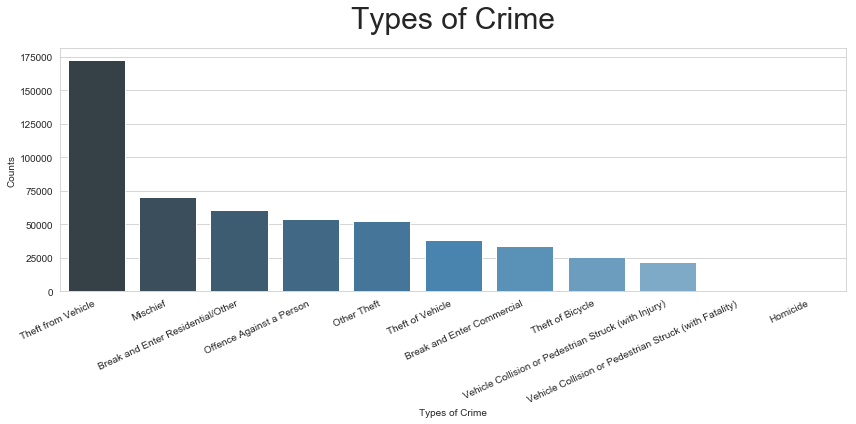

In [5]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='TYPE',data=df,palette='Blues_d', order = df['TYPE'].value_counts().index)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

# Trends over the years of the crime in Vancouver

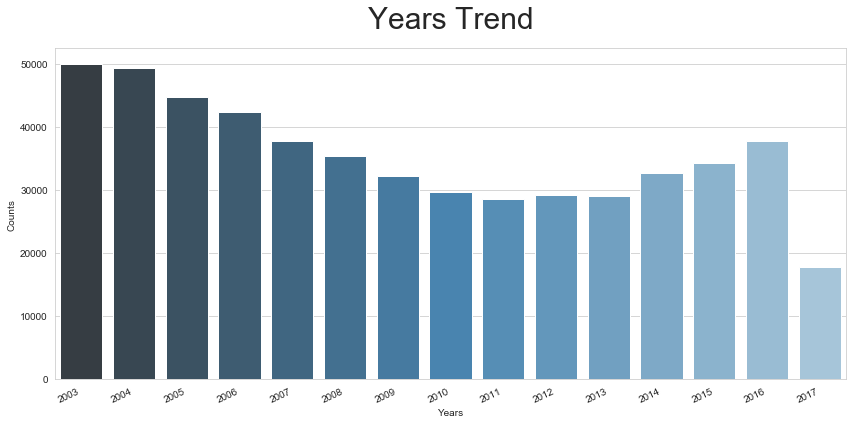

In [6]:
plt.figure(figsize=(12,6))
plt.title('Years Trend',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='YEAR',data=df,palette='Blues_d')
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

# 5 safest area in Vancouver

In [7]:
df.groupby(['NEIGHBOURHOOD','TYPE']).count()['counter'].sort_values(ascending=True).head(5)

NEIGHBOURHOOD      TYPE                                                  
Musqueam           Other Theft                                               1
                   Vehicle Collision or Pedestrian Struck (with Fatality)    1
South Cambie       Vehicle Collision or Pedestrian Struck (with Fatality)    2
Arbutus Ridge      Vehicle Collision or Pedestrian Struck (with Fatality)    3
Dunbar-Southlands  Vehicle Collision or Pedestrian Struck (with Fatality)    3
Name: counter, dtype: int64

# 5 dangerous area in Vancouver and major crime type

In [8]:
danger_region = df.groupby(['NEIGHBOURHOOD','TYPE']).count()['counter'].sort_values(ascending=False).head(10)
danger_region

NEIGHBOURHOOD              TYPE                      
Central Business District  Theft from Vehicle            48003
                           Other Theft                   19244
West End                   Theft from Vehicle            16904
Central Business District  Mischief                      16672
Fairview                   Theft from Vehicle            11934
Mount Pleasant             Theft from Vehicle             9679
Central Business District  Break and Enter Commercial     9371
Kitsilano                  Theft from Vehicle             8912
Renfrew-Collingwood        Theft from Vehicle             8420
Kensington-Cedar Cottage   Theft from Vehicle             7474
Name: counter, dtype: int64

# Which month has the maximum crime rate over the given peroid of time?

In [9]:
df.groupby(['MONTH']).count()['counter'].sort_values(ascending=False).head(5)

MONTH
5    46883
6    46711
8    45946
7    45679
3    45314
Name: counter, dtype: int64

# Which day has the maximum crime rate over the given period of time?

In [10]:
df.groupby(['DAY']).count()['counter'].sort_values(ascending=False).head(5)

DAY
1     19512
15    19298
12    18388
7     18186
11    18171
Name: counter, dtype: int64

# Which hour has the maximum crime rate over the given period of time?

In [11]:
df.groupby(['HOUR']).count()['counter'].sort_values(ascending=False).head(5)

HOUR
18.0    36195
17.0    31621
19.0    29590
22.0    28791
20.0    27707
Name: counter, dtype: int64